In [2]:
#импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Распределение Лапласа (двойное экспоненциальное)

$f(x) = \frac{1}{2}e^{-|x|}$ $-$ функция плотности вероятности для распределения Лапласа

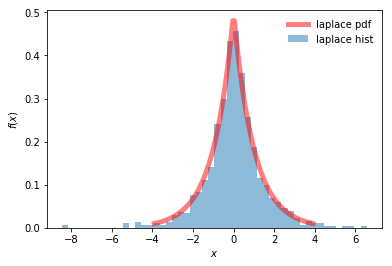

In [3]:
#Сгенерируем выборку объёма 1000 для выбранного распределения:
s = sts.laplace.rvs(size=1000)
#Построим гистограмму выборки:
plt.hist(s, normed=True, histtype='stepfilled', alpha=0.5, label='laplace hist', bins = 50)

#Нарисуем поверх гистограммы теоретическую плотность распределения нашей случайной величины
x = np.linspace(sts.laplace.ppf(0.01), sts.laplace.ppf(0.99), 100)
plt.plot(x, sts.laplace.pdf(x),'r-', lw=5, alpha=0.5, label='laplace pdf')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='best', frameon=False)
plt.show()

Теперь наша задача — оценить распределение выборочного среднего нашей случайной величины при разных объёмах выборок. 

In [4]:
#Вычислим теоретические среднее и дисперсию для распределения Лапласа, они пригодятся в дальнейшем.
#для оценки параметров нормального распределения, которыми, согласно ЦПТ, приближается распределение выборочных средних
mean, var = sts.laplace.stats(moments='mv')

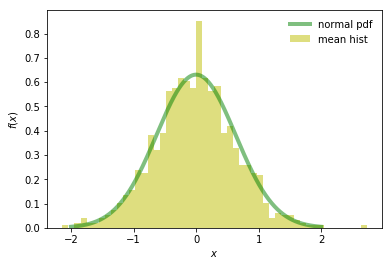

In [9]:
#Сгенерируем 1000 выборок объема n=5
n = 5
v = []
for i in xrange(0,1000):
    sample = sts.laplace.rvs(size=n) 
    v.append(np.mean(sample)) #посчитаем выборочное среднее для каждой выборки
#Посчитаем значения параметров нормальных распределений, 
#которыми, согласно ЦПТ, приближается распределение выборочных средних:
mu = mean #математическое ожидание будет равно теоретическому согласно ЦПТ
sigma = (var/n)**.5 #среднеквадратическое отклонение вычисляем как корень из теоретической диспресии, поделенной на объем выборки
# зададим нормально распределенную случайную величину
norm_rv = sts.norm(loc=mu, scale=sigma)    
x = np.linspace(-2,2,1000)
pdf = norm_rv.pdf(x) #плотность вероятности для нормальной случайной величины
plt.plot(x, pdf, 'g-', lw=4, alpha=0.5, label='normal pdf')
plt.hist(v, normed=True, histtype='stepfilled', alpha=0.5, label='mean hist', color='y', bins = 50)#гистограмма выборки средних значений выборок
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='best', frameon=False)

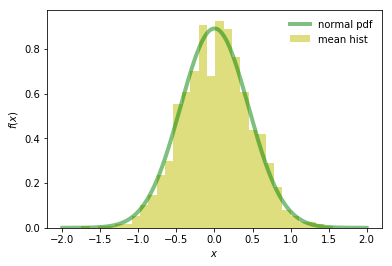

In [7]:
#Сгенерируем 1000 выборок объема n=10
n = 10
v = []
for i in xrange(0,1000):
    sample = sts.laplace.rvs(size=n) 
    v.append(np.mean(sample)) #посчитаем выборочное среднее для каждой выборки
#Посчитаем значения параметров нормальных распределений, 
#которыми, согласно ЦПТ, приближается распределение выборочных средних:
mu = mean #математическое ожидание будет равно теоретическому согласно ЦПТ
sigma = (var/n)**.5 #среднеквадратическое отклонение вычисляем как корень из теоретической диспресии, поделенной на объем выборки
# зададим нормально распределенную случайную величину
norm_rv = sts.norm(loc=mu, scale=sigma)    
x = np.linspace(-2,2,1000)
pdf = norm_rv.pdf(x) #плотность вероятности для нормальной случайной величины
plt.plot(x, pdf, 'g-', lw=4, alpha=0.5, label='normal pdf')
plt.hist(v, normed=True, histtype='stepfilled', alpha=0.5, label='mean hist', color='y', bins = 30)#гистограмма выборки средних значений выборок
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='best', frameon=False)

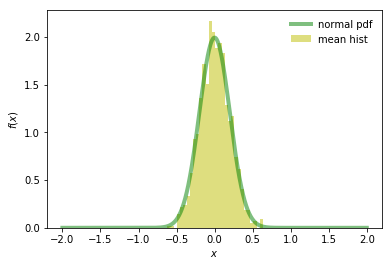

In [8]:
#Сгенерируем 1000 выборок объема n=50
n = 50
v = []
for i in xrange(0,1000):
    sample = sts.laplace.rvs(size=n) 
    v.append(np.mean(sample)) #посчитаем выборочное среднее для каждой выборки
#Посчитаем значения параметров нормальных распределений, 
#которыми, согласно ЦПТ, приближается распределение выборочных средних:
mu = mean #математическое ожидание будет равно теоретическому согласно ЦПТ
sigma = (var/n)**.5 #среднеквадратическое отклонение вычисляем как корень из теоретической диспресии, поделенной на объем выборки
# зададим нормально распределенную случайную величину
norm_rv = sts.norm(loc=mu, scale=sigma)    
x = np.linspace(-2,2,1000)
pdf = norm_rv.pdf(x) #плотность вероятности для нормальной случайной величины
plt.plot(x, pdf, 'g-', lw=4, alpha=0.5, label='normal pdf')
plt.hist(v, normed=True, histtype='stepfilled', alpha=0.5, label='mean hist', color='y', bins = 30)#гистограмма выборки средних значений выборок
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='best', frameon=False)

# Выводы

На практике было проверено утверждение центральной предельной теоремы $-$ распределение выборочных средних достаточно хорошо описывается нормальным распределением: $\overline{X}_n \approx \sim N(EX,\frac{DX}n )$. С ростом $n$ (объем выборки) точность аппроксимации распределения выборочных средних нормальным распределением растет. Увеличение выборки не влияет на форму гистограммы, она становится только более узкой, более сконцентрированной вокруг среднего значения — нуля.



# Ссылки
1.[Wikipedia Распределение Лапласа](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B0%D0%BF%D0%BB%D0%B0%D1%81%D0%B0)

2.[SciPy Laplace](https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous_laplace.html)

3.[SciPy Laplace Implementation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.laplace.html#scipy.stats.laplace)